# Titanic
[Reto Kaggle](https://www.kaggle.com/competitions/titanic/overview)

Importar las librerias necesarias para resolver el reto.
* **NumPy**: da soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
* **Pandas**: esta escrita como extensión de NumPy para manipulación y análisis de datos. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
* **Scikit-learn**: libreria de aprendizaje automático de software libre.
* **Matplotlib**: libreria para la generación de gráficos a partir de datos contenidos en listas o arrays y su extensión matemática NumPy.
* **Plotly**: libreria para hacer graficas interactivas y de buena calidad.
* **Tree**: graficar el arboles de decisión.
* **Acuracy Score**, **Confusion Matrix**: Medidas para evaluar que tan bueno es nuestro modelo.
* **ConfusionMatrixDisplay**: para graficar la confusion matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

### Leer archivos
Asignamos cada uno de los archivos CSV a un dataframe diferente, la lectura la hacemos con el comando: **pd.read_csv** y como parametro le enviamos la ruta y nombre del archivo que queremos leer.

**Dataframe:** es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos en columnas. Es similar a una hoja de cálculo o una tabla de SQL. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.
* pd.read_excel()
* pd.read_html()
* pd.read_json()
* pd.read_xml()

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
gender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [ ]:
train_data.head(1)

In [ ]:
test_data.head(3)

In [ ]:
gender.head(3)

### Variables de los DataSets
* **Survived:**	Survival (0 = No, 1 = Yes)
* **Pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **Sex:** Sex
* **Age:** Age in years
* **SibSp:** # of siblings / spouses aboard the Titanic
* **Parch:** # of parents / children aboard the Titanic
* **Ticket:** Ticket number
* **Fare:** Passenger fare
* **Cabin:** Cabin number
* **Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Unir todos los dataframes en uno mismo

### Paso No. 1
Unir el dataframe **test_data** con el dataframe **gender** en uno mismo

[Pandas Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)



In [ ]:
temp_data = test_data.merge(gender, 
                             how="left",
                             on="PassengerId")

temp_data.head(1)

In [ ]:
print('Filas test_data: ', len(test_data))
print('Filas gender: ', len(gender))
print('Filas union: ', temp_data['PassengerId'].count())

### Paso No. 2
Unir el dataframe **temp_data** con el dataframe **train_data** en uno mismo para tener toda la información de titanic en un mismo dataframe.

In [ ]:
titanic = pd.merge(train_data, 
                   temp_data,
                   how="outer")

titanic.head(1)

In [ ]:
print('Filas train_data: ', len(train_data))
print('Filas test_data_complete: ', len(temp_data))
print('Filas titanic: ', len(titanic))

### Exportar dataframe a CSV

In [ ]:
titanic.to_csv('titanic.csv')

# Exploración de datos (sin limpiar)
Revisar las columnas con datos faltantes y aplicarles alguna logica para asignarles valor.

### Datos de estadistica descriptiva
[Pandas describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
titanic.describe()

### Validar columnas con datos vacios y aplicar reglas para asignarles valor
**Columna Fare**

In [ ]:
titanic['Fare'].isna().sum()

In [ ]:
titanic[titanic['Fare'].isna()]

Para la columna **Fare** solo nos falta un valor, el cual vamos a asignarle valor aplicandole la siguiente logica:
* Una persona que tenga ticket de la misma clase
* Haya embarcado en el mismo puerto
* Tenga el mismo numero de acompañantes

In [ ]:
#titanic.query('Pclass == 3 & Embarked == "S" & SibSp == 0 & Parch == 0')
titanic[(titanic['Pclass'] == 3) 
        & (titanic['Embarked'] == 'S') 
        & (titanic['SibSp'] == 0)
        & (titanic['Parch'] == 0)]

In [ ]:
print('Tarifa promedio: ', titanic[(titanic['Pclass'] == 3) 
                                & (titanic['Embarked'] == 'S') 
                                & (titanic['SibSp'] == 0)
                                & (titanic['Parch'] == 0)]['Fare'].mean())

In [ ]:
titanic.loc[titanic['Fare'].isna(), 'Fare'] = titanic[(titanic['Pclass'] == 3) 
                                                    & (titanic['Embarked'] == 'S') 
                                                    & (titanic['SibSp'] == 0)
                                                    & (titanic['Parch'] == 0)]['Fare'].mean()

**Columna Cabin**

In [ ]:
titanic['Cabin'].isna().sum()

In [ ]:
print('Datos de cabina: ', round((titanic['Cabin'].isna().sum() / len(titanic)) * 100, 2), '%')

Para la columna **Cabin** nos falta aproximadamente el 80% de los datos por lo que vamos a eliminar la columna.

[Pandas drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [ ]:
titanic.drop(['Cabin'], axis=1, inplace= True)

In [ ]:
titanic.head(1)

**Columna Embarked**

In [ ]:
titanic['Embarked'].isna().sum()

In [ ]:
titanic[titanic['Embarked'].isnull()]

Para la columna **Embarked** nos faltan 2 datos por lo que vamos a asignar la moda del lugar de embarque para la misma clase.

In [ ]:
titanic[titanic['Pclass'] == 1]['Embarked'].mode()[0]

In [ ]:
titanic.loc[titanic['Embarked'].isnull(), 'Embarked'] = titanic[titanic['Pclass'] == 1]['Embarked'].mode()[0]

**Columna Age**

In [ ]:
titanic['Age'].isna().sum()

In [ ]:
round((titanic['Age'].count() / titanic['PassengerId'].count()) * 100, 2)

Para el campo **Age** vamos a rellenar los datos faltantes con la edad promedio de las personas que pertenezcan a la misma clase y mismo genero.

In [ ]:
titanic[(titanic['Age'].isna())]

In [ ]:
titanic[(titanic['Age'].notna())].groupby(['Pclass', 'Sex'])['Age'].mean()

In [ ]:
titanic['Age'] = titanic.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
titanic.count()

# Exploración de datos (limpios)

### 1) ¿Cuantos pasajeros iban en el titanic?

In [ ]:
len(titanic)

### 2) ¿Cuantos pasajeros eran hombres y cuantas mujeres?

In [ ]:
titanic.groupby(['Sex'])['PassengerId'].count()

### Grafica de Pastel con Matplotlib
[Matplotlib Pie Chart](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

In [ ]:
y = titanic.groupby(['Sex'])['PassengerId'].count()
figuras, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(y, labels = y, autopct='%1.2f%%')
ax.legend(wedges, y.index,
          title="Sex",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total Pasajeros')

### 3) ¿Cuantos pasajeros sobrevivieron?

In [ ]:
print('Total sobrevivientes: ', len(titanic[titanic['Survived'] == 1]))
titanic[titanic['Survived'] == 1].groupby(['Sex'])['PassengerId'].count()

### Grafica de Pastel con Plotly
[Plotly Pie Chart](https://plotly.com/python/pie-charts/)

In [ ]:
y = titanic[titanic['Survived'] == 1].groupby(['Sex'])['PassengerId'].count()

fig = go.Figure(data=[go.Pie(labels=y.index, values=y.values)])
fig.show()

#colors = ['gold', 'mediumturquoise']
#fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
#                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#fig.show()

### 4) ¿Que porcentaje de mujeres y hombres sobrevivió?

In [ ]:
total_mujeres = len(titanic[titanic['Sex'] == 'female'])
total_hombres = len(titanic[titanic['Sex'] == 'male'])
print('Total pasajeros mujeres: ', total_mujeres)
print('Total pasajeros hombres: ', total_hombres)

sobrevivientes_mujeres = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])
sobrevivientes_hombres = len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)])
print('Sobrevivientes mujeres: ', (sobrevivientes_mujeres / total_mujeres) * 100)
print('Sobrevivientes hombres: ', (sobrevivientes_hombres / total_hombres) * 100)

### 5) ¿Cuantos pasajeros iban en cada clase?

In [ ]:
titanic.groupby(['Pclass'])[['PassengerId']].count()

### Grafica de Barras con Matplotlib
[Matplotlib Bar Chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [ ]:
y = titanic.groupby(['Pclass'])['PassengerId'].count()
figuras, ax = plt.subplots()
wedges, texts, autotexts = ax.bar(y.index, y.values)
plt.xlabel("Clase")
plt.ylabel("Pasajeros")
ax.set_title('Pasajeros por Clase')

### 6) ¿Cuantos pasajeros sobrevivieron por clase y sexo?

In [ ]:
titanic[titanic['Survived'] == 1].groupby(['Sex', 'Pclass'])[['Survived']].count()

In [ ]:
total_1 = len(titanic[titanic['Pclass'] == 1])
total_2 = len(titanic[titanic['Pclass'] == 2])
total_3 = len(titanic[titanic['Pclass'] == 3])
print('Total pasajeros primera clase: ', total_1)
print('Total pasajeros segunda clase: ', total_2)
print('Total pasajeros tercera clase: ', total_3)

sobrevivientes_1 = len(titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1)])
sobrevivientes_2 = len(titanic[(titanic['Pclass'] == 2) & (titanic['Survived'] == 1)])
sobrevivientes_3 = len(titanic[(titanic['Pclass'] == 3) & (titanic['Survived'] == 1)])
print('Sobrevivientes primera clase: ', (sobrevivientes_1 / total_1) * 100)
print('Sobrevivientes segunda clase: ', (sobrevivientes_2 / total_2) * 100)
print('Sobrevivientes tercera clase: ', (sobrevivientes_3 / total_3) * 100)

# Algoritmo de Machine Learning

## Paso 1: Elegir columna a predecir (Label)
Asigno en una variable mi columna de predicción.

In [ ]:
y = train_data["Survived"]

## Paso 2: Elijo los features que voy a utilizar para entrenar
Asigno esos features en una variable para evitar reescribirlos.

In [ ]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

## Paso 3: Las variables categoricas las convierto en columnas individuales
La función **get_dummies** permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad.

In [ ]:
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

#titanic = pd.get_dummies(titanic[features])
#X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic["Survived"], test_size=0.2, random_state=42)

In [ ]:
X_test

## Paso 4: Crear el modelo
### Random Forest
Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. Es una modificación sustancial de bagging que construye una larga colección de árboles no correlacionados y luego los promedia.

[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

* **n_estimators:** El numero de arboles en el bosque
* **max_depth:** La profundidad maxima del arbol.
* **random_state:** Sirve para que la muestra generada sea siempre la misma.

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=11)

## Paso 5: Entrenar el modelo

In [ ]:
model.fit(X, y)

## Paso 6: Generamos predicciones con el modelo entrenado

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

### Unimos nuestro dataframe test con las predicciones para conocer el resultado

In [ ]:
X_test['prediction'] = predictions

In [ ]:
X_test.head(5)

### Guardamos nuestras predicciones en un archivo

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

### Accuracy Score
Mide cuantas predicciones del modelo fueron correctas en comparación con el total de predicciones.

Es como un porcentaje de cuantas predicciones fueron correctas.

In [ ]:
accuracy_score(gender['Survived'], predictions)

### Confusion Matrix
Es una forma de representar cuantas predicciones fueron correctas y cuantas incorrectas.

In [ ]:
confusion_matrix(gender['Survived'], predictions)

In [ ]:
ConfusionMatrixDisplay.from_predictions(gender['Survived'], 
                                        predictions, 
                                        display_labels=['Survived', 'Not Survived'])

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = model.feature_names_in_, 
               class_names = ['Survived', 'Not Survived'],#model.classes_,
               filled = True)

# ¿Quién de ellos sobrevivirá en el Titanic?

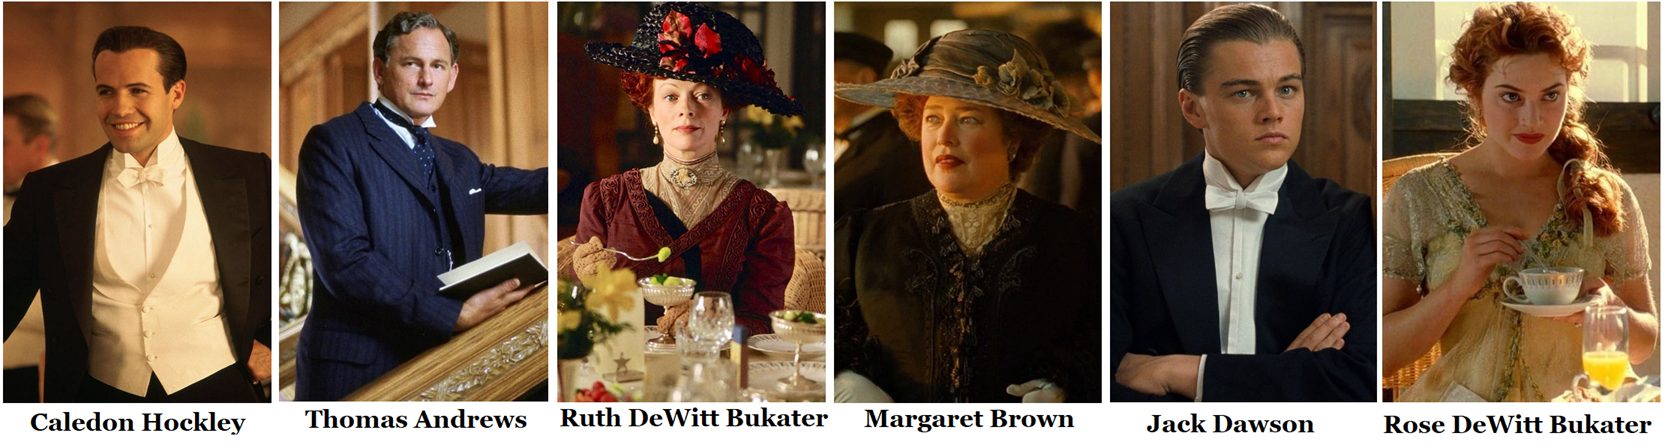

Vamos a construir un dataframe de forma manual con estos personajes

In [ ]:
personajes = pd.DataFrame({
                            'Name': pd.Series(dtype='str'),
                            'Pclass': pd.Series(dtype='int'),
                            'Sex': pd.Series(dtype='str'),
                            'SibSp': pd.Series(dtype='int'),
                            'Parch': pd.Series(dtype='int')
                        })

personajes = personajes.append({
                                'Name': 'Caledon Nathan «Cal» Hockley', 
                                'Pclass': 1, 
                                'Sex': 'male', 
                                'SibSp': 0, 
                                'Parch': 0}, ignore_index=True)

personajes = personajes.append({
                                'Name': 'Thomas Andrews',
                                'Pclass': 1, 
                                'Sex': 'male', 
                                'SibSp': 0, 
                                'Parch': 0}, ignore_index=True)

personajes = personajes.append({
                                'Name': 'Ruth DeWitt Bukater', 
                                'Pclass': 1, 
                                'Sex': 'female', 
                                'SibSp': 0, 
                                'Parch': 1}, ignore_index=True)

personajes = personajes.append({
                                'Name': 'Margaret Brown', 
                                'Pclass': 1, 
                                'Sex': 'female', 
                                'SibSp': 0, 
                                'Parch': 0}, ignore_index=True)

personajes = personajes.append({
                                'Name': ' Jack Dawson', 
                                'Pclass': 3, 
                                'Sex': 'male', 
                                'SibSp': 0, 
                                'Parch': 0}, ignore_index=True)

personajes = personajes.append({
                                'Name': 'Rose DeWitt Bukater', 
                                'Pclass': 1, 
                                'Sex': 'female', 
                                'SibSp': 0, 
                                'Parch': 1}, ignore_index=True)

In [ ]:
personajes

In [ ]:
P_personajes = pd.get_dummies(personajes[features])

In [ ]:
P_personajes

In [ ]:
predictions = model.predict(P_personajes)

In [ ]:
personajes['prediccion'] = predictions

In [ ]:
personajes